In [1]:
import sqlite3
import powerlaw
import numpy as np

In [2]:
sqlite3_filename = "188-million-us-wildfires\\FPA_FOD_20170508.sqlite"

In [3]:
conn = sqlite3.connect(sqlite3_filename)
cur = conn.cursor()  # ?
#cur.execute('SELECT LONGITUDE, LATITUDE, FIRE_SIZE FROM fires')
cur.execute('SELECT FIRE_SIZE FROM fires')
tableData = cur.fetchall()
conn.close()

In [4]:
tableData[:5]

[(0.1,), (0.25,), (0.1,), (0.1,), (0.1,)]

In [5]:
# Here we clean up our list of data a little bit, and find the minimum-sized fire and the maximum-sized fire.
data = []
minSize = maxSize = tableData[0][0]
for i in range(len(tableData)):
    size = tableData[i][0]
    minSize = min(minSize, size)
    maxSize = max(maxSize, size)
    data.append(size)

In [6]:
data[:5]

[0.1, 0.25, 0.1, 0.1, 0.1]

In [7]:
np.seterr(divide='ignore', invalid='ignore')
#subset_of_data = []
#for i in range(len(data)):
#    if i % 5 == 0:
#        subset_of_data.append(data[i])
results = powerlaw.Fit(data)

Calculating best minimal value for power law fit


In [53]:
new_data = []  # dataset w/ points where size > results.xmin
overXMin = 0
for i in range(len(data)):
    if data[i] > results.xmin:
        overXMin += 1
        new_data.append(data[i])

print("count:", len(data))
print("overXMin:", overXMin)
print("min:", minSize)
print("max:", maxSize)
print("alpha:", results.alpha)
print("sigma:", results.sigma)
print("xmin:", results.xmin)

count: 1880465
overXMin: 29572
min: 1e-05
max: 606945.0
alpha: 1.69384889733
sigma: 0.00403175719607
xmin: 234.0


In [61]:
results = powerlaw.Fit(data)

Calculating best minimal value for power law fit


In [9]:
#print(results.power_law.alpha)

In [10]:
#print(results.power_law.xmin)

In [69]:
R, p = results.distribution_compare('power_law', 'lognormal', normalized_ratio=True)

In [72]:
# R is the loglikelihood ratio between the two candidate distributions.
# If R > 0, then the data is more likely to be in the first distribution.
# If R < 0, then the data is more likely to be in the second distribution.
# normalized_ratio=True divides R by (sigma*sqrt(n))
R

-9.203879586477413

In [71]:
# p is the significance value for the identified direction (i.e., for R > 0 or for R < 0)
p

3.4525412427188135e-20

In [66]:
R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)

In [67]:
R

45.847843131392423

In [68]:
p

0.0

In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

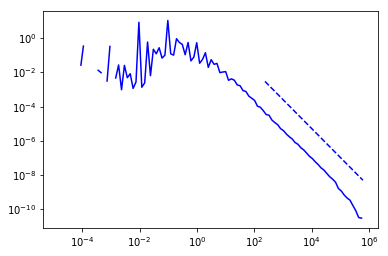

In [49]:
# plotting the pdf and its power law fit together
fig1 = powerlaw.plot_pdf(data, color='b')
results.power_law.plot_pdf(color='b', linestyle='--')
#plt.savefig("Figure.jpg")
plt.show()

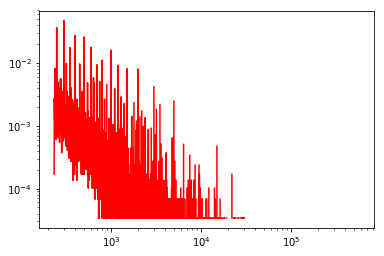

In [63]:
powerlaw.plot_pdf(new_data, linear_bins=True, color='r')  # generated a memory error, but I don't think this matters too much
plt.show()

In [74]:
results.supported_distributions

{'exponential': powerlaw.Exponential,
 'lognormal': powerlaw.Lognormal,
 'lognormal_positive': powerlaw.Lognormal_Positive,
 'power_law': powerlaw.Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law}

In [75]:
R, p = results.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)

Assuming nested distributions


In [76]:
R

-16.181418108371233

In [77]:
p

0.0

In [78]:
R, p = results.distribution_compare('lognormal', 'truncated_power_law', normalized_ratio=True)

In [79]:
R

-12.745148715734649

In [81]:
p

3.3175757256370922e-37

In [83]:
results.truncated_power_law.parameter1_name

'alpha'

In [84]:
results.truncated_power_law.parameter1

1.6370944000140339

In [85]:
results.truncated_power_law.parameter2_name

'lambda'

In [86]:
results.truncated_power_law.parameter2

3.928845085312381e-06

In [89]:
results.truncated_power_law.parameter3_name == None

True